In [2]:
import numpy as np
import pandas as pd
import pymongo as pm
import pickle
import re
import json
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

get the data!

In [5]:
client = pm.MongoClient('localhost', 27017)

db = client['full_texts'] # creates database if not there
documents = db['train_val_v2']
df_method = pd.DataFrame(list(documents.find({'label': 'method'}).limit(10000)))
df_result = pd.DataFrame(list(documents.find({'label': 'result'}).limit(10000)))
df_conc = pd.DataFrame(list(documents.find({'label': 'conclusion'}).limit(10000)))
df_intro = pd.DataFrame(list(documents.find({'label': 'introduction'}).limit(10000)))

data exploration code

In [4]:
df['location'].head()
df.isnull().values.any()
df.isnull().sum().sum()
nan_rows = df.loc[df['location'].isnull()]
#df.dropna(inplace = True)
#df.reset_index(drop = True, inplace = True)

NameError: name 'df' is not defined

In [6]:
df_method['locations_scaled'] = df_method['location'].round(1)
df_result['locations_scaled'] = df_result['location'].round(1)
df_conc['locations_scaled'] = df_conc['location'].round(1)
df_intro['locations_scaled'] = df_intro['location'].round(1)

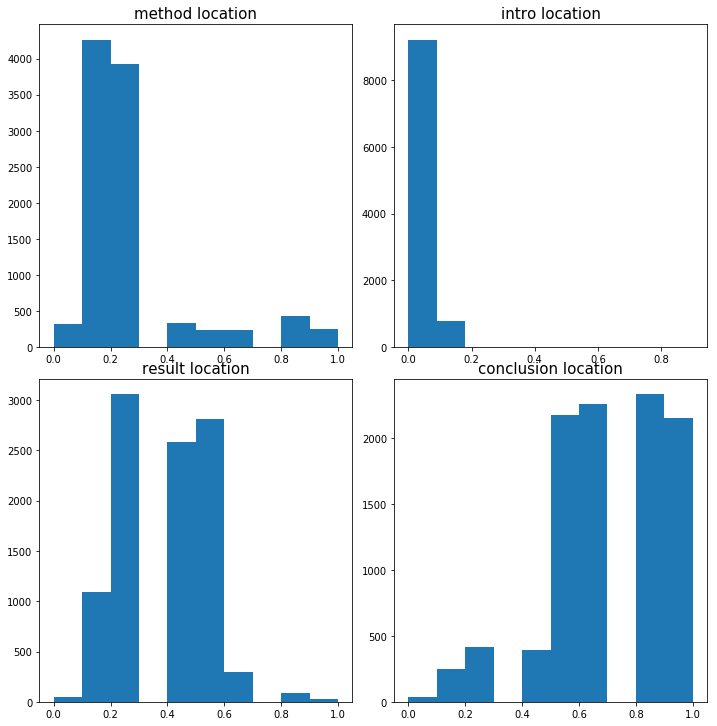

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.tight_layout()
ax[0, 0].hist(df_method['locations_scaled'])
ax[0, 0].set_title("method location", fontsize=15)

ax[0, 1].hist(df_intro['locations_scaled'])
ax[0, 1].set_title("intro location", fontsize=15)

ax[1, 0].hist(df_result['locations_scaled'])
ax[1, 0].set_title("result location", fontsize=15)

ax[1, 1].hist(df_conc['locations_scaled'])
ax[1, 1].set_title("conclusion location", fontsize=15)

fig.savefig('section_locations.png')